# import libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/breast-cancer-wisconsin-data/data.csv


# Data Preprocessing

In [2]:
df = pd.read_csv("/kaggle/input/breast-cancer-wisconsin-data/data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
df.shape

(569, 33)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
df.drop(columns="Unnamed: 32", inplace=True)

In [6]:
df["diagnosis"].unique()

array(['M', 'B'], dtype=object)

In [7]:
df = df.replace({"M": 1, "B": 0})

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
diagnosis,569.0,3.725835e-01,4.839180e-01,0.000000,0.000000,0.000000,1.000000e+00,1.000000e+00
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01


<AxesSubplot: >

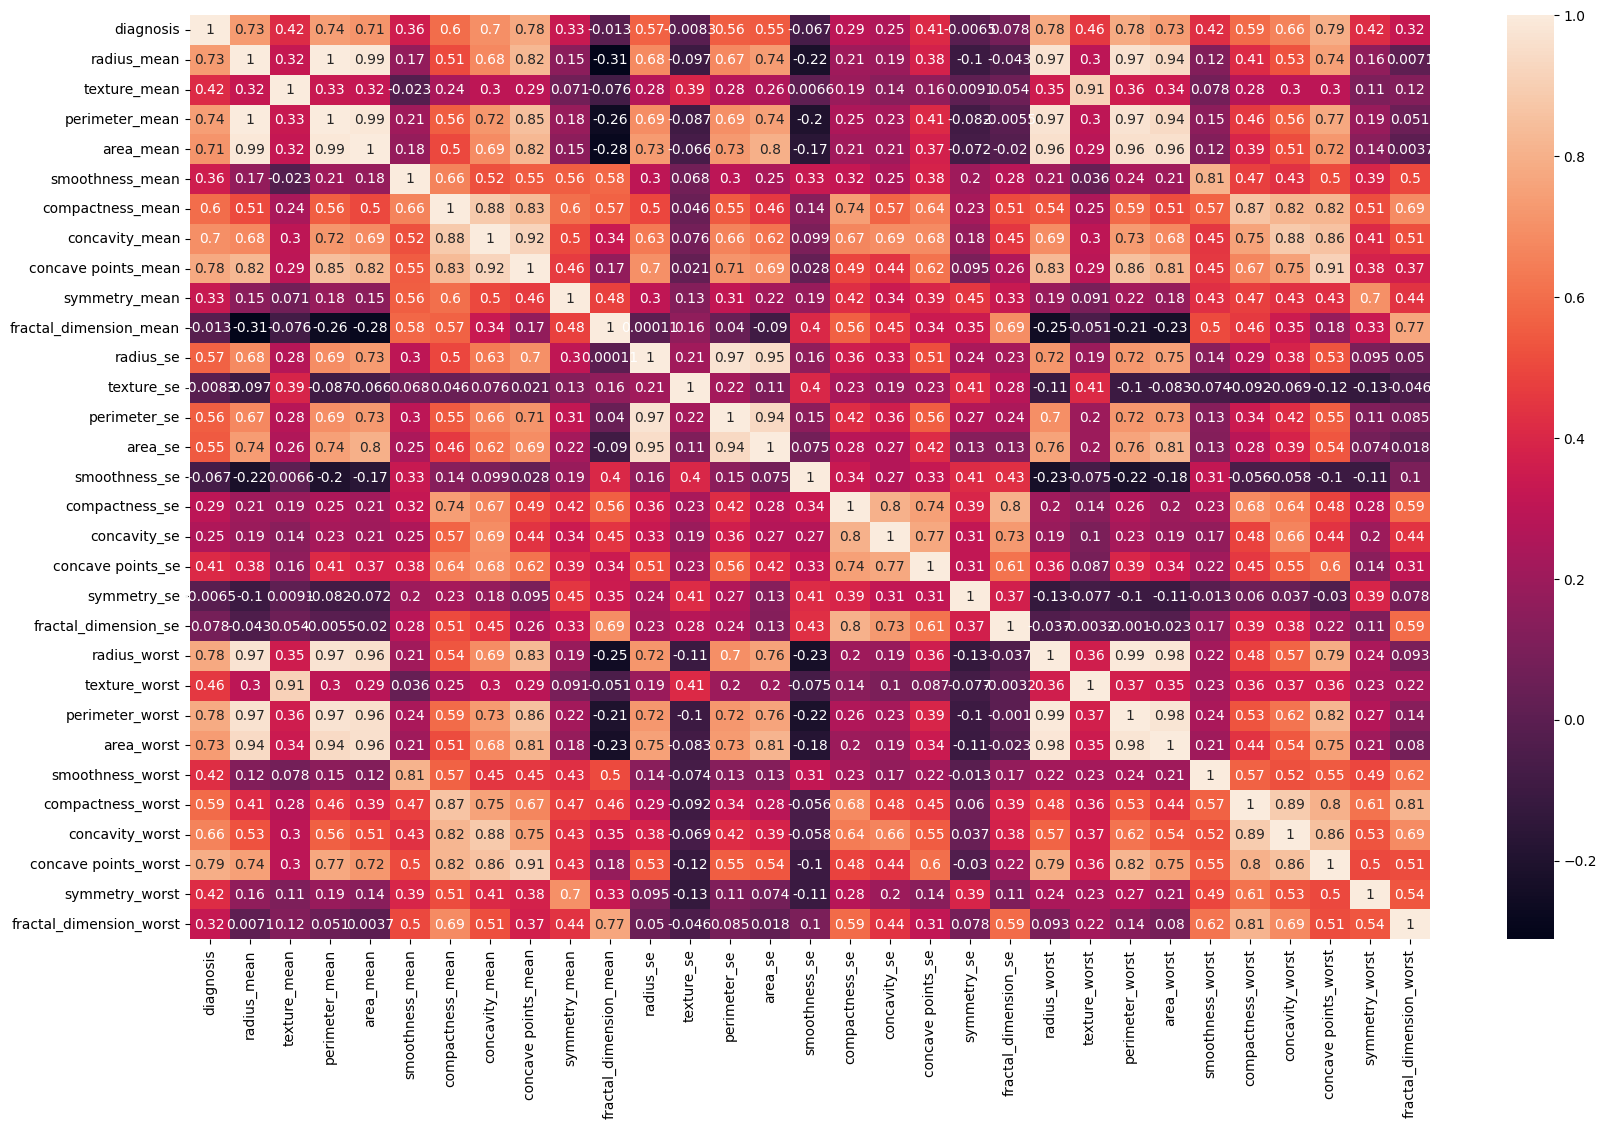

In [9]:
plt.figure(figsize=(20,12))
sns.heatmap(df.drop(columns="id").corr(), annot=True)

(array([ 41., 160., 175., 101.,  51.,  25.,   9.,   2.,   1.,   4.]),
 array([0.04996 , 0.054708, 0.059456, 0.064204, 0.068952, 0.0737  ,
        0.078448, 0.083196, 0.087944, 0.092692, 0.09744 ]),
 <BarContainer object of 10 artists>)

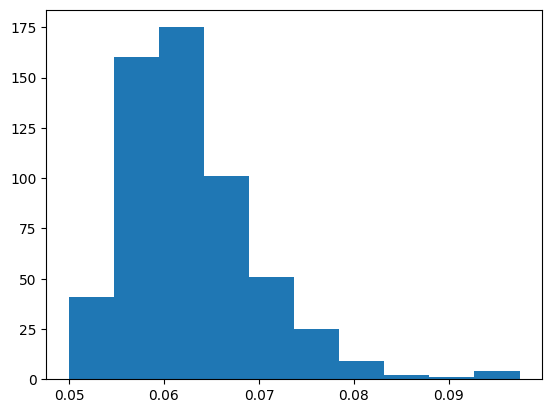

In [10]:
plt.hist(df["fractal_dimension_mean"])

(array([129., 220., 136.,  52.,  18.,   9.,   1.,   3.,   0.,   1.]),
 array([0.3602 , 0.81268, 1.26516, 1.71764, 2.17012, 2.6226 , 3.07508,
        3.52756, 3.98004, 4.43252, 4.885  ]),
 <BarContainer object of 10 artists>)

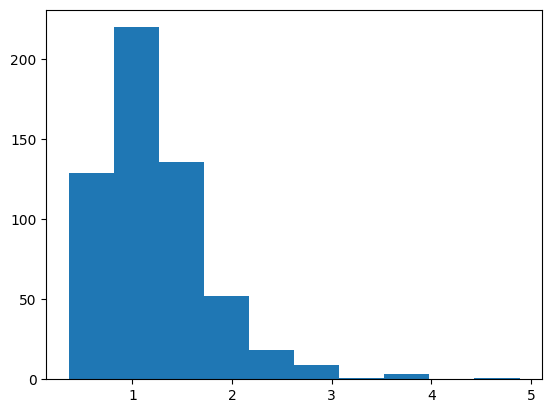

In [11]:
plt.hist(df["texture_se"]) 

(array([137., 264., 103.,  38.,  14.,   5.,   5.,   2.,   0.,   1.]),
 array([0.007882 , 0.0149888, 0.0220956, 0.0292024, 0.0363092, 0.043416 ,
        0.0505228, 0.0576296, 0.0647364, 0.0718432, 0.07895  ]),
 <BarContainer object of 10 artists>)

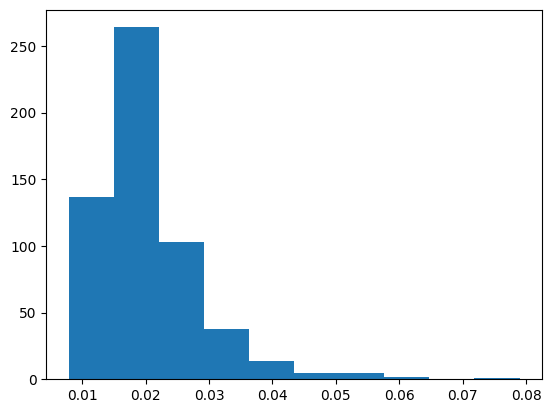

In [12]:
plt.hist(df["symmetry_se"])

# Splitting Data

In [13]:
X = df.drop(columns=["id", "diagnosis"])
y = df["diagnosis"]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression

In [15]:
lr_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("logistic_regression", LogisticRegression())
])

In [16]:
lr_pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic_regression', LogisticRegression())])

In [17]:
lr_pipeline.score(X_test, y_test)

0.9736842105263158

In [18]:
predicted = lr_pipeline.predict(X_test)
truth = y_test

Text(50.722222222222214, 0.5, 'Truth')

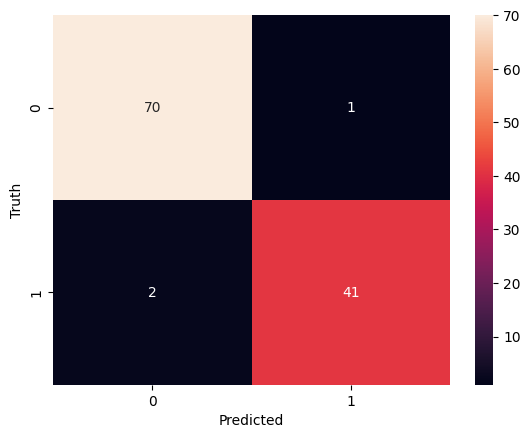

In [19]:
cm = confusion_matrix(truth, predicted)
sns.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [20]:
precision = np.sum(truth & predicted) / np.sum(predicted)
recall = np.sum(truth & predicted) / np.sum(truth)
f1 = 2 * precision * recall / (precision + recall)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)

Precision: 0.9761904761904762
Recall: 0.9534883720930233
F1 score: 0.9647058823529412


# Decision Trees

In [21]:
tree_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("logistic_regression", DecisionTreeClassifier())
])
tree_pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic_regression', DecisionTreeClassifier())])

In [22]:
tree_pipeline.score(X_test, y_test)

0.9385964912280702

In [23]:
predicted = tree_pipeline.predict(X_test)
truth = y_test

Text(50.722222222222214, 0.5, 'Truth')

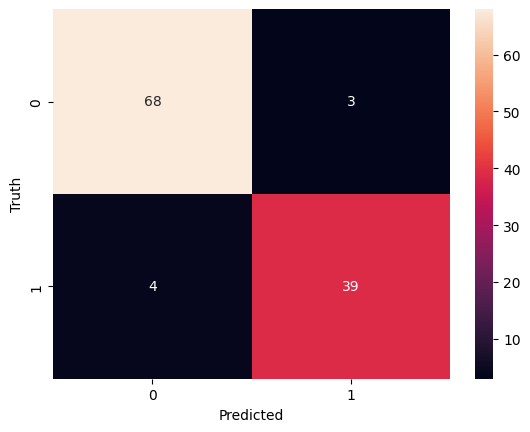

In [24]:
cm = confusion_matrix(truth, predicted)
sns.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [25]:
precision = np.sum(truth & predicted) / np.sum(predicted)
recall = np.sum(truth & predicted) / np.sum(truth)
f1 = 2 * precision * recall / (precision + recall)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)

Precision: 0.9285714285714286
Recall: 0.9069767441860465
F1 score: 0.9176470588235294


# Random Forest

In [26]:
rf_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("random_forest", RandomForestClassifier())
])
rf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('random_forest', RandomForestClassifier())])

In [27]:
rf_pipeline.score(X_test, y_test)

0.956140350877193

In [28]:
predicted = rf_pipeline.predict(X_test)
truth = y_test

Text(50.722222222222214, 0.5, 'Truth')

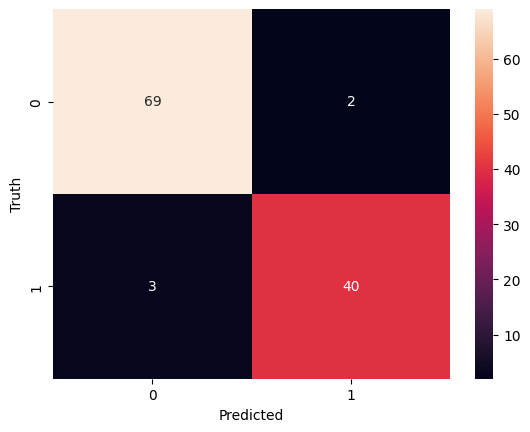

In [29]:
cm = confusion_matrix(truth, predicted)
sns.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [30]:
precision = np.sum(truth & predicted) / np.sum(predicted)
recall = np.sum(truth & predicted) / np.sum(truth)
f1 = 2 * precision * recall / (precision + recall)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)

Precision: 0.9523809523809523
Recall: 0.9302325581395349
F1 score: 0.9411764705882352
